In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

import numpy as np
# Load the data from the CSV file
data = pd.read_csv('years_studied.csv')
#select from data only columns of interest - gender, origin, years studied

data = data.loc[np.repeat(data.index.values, data['Count'])]
data = data[['Gender', 'Origin', 'Years_studied']]





In [11]:
print(data)

    Gender   Origin  Years_studied
0     Male    Local              2
0     Male    Local              2
0     Male    Local              2
0     Male    Local              2
0     Male    Local              2
..     ...      ...            ...
15  Female  Foreign              5
15  Female  Foreign              5
15  Female  Foreign              5
15  Female  Foreign              5
15  Female  Foreign              5

[1294 rows x 3 columns]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{('2', 'Female', 'Foreign'): 114, ('2', 'Female', 'Local'): 62, ('2', 'Male', 'Foreign'): 109, ('2', 'Male', 'Local'): 51, ('3', 'Female', 'Foreign'): 120, ('3', 'Female', 'Local'): 91, ('3', 'Male', 'Foreign'): 115, ('3', 'Male', 'Local'): 84, ('4', 'Female', 'Foreign'): 61, ('4', 'Female', 'Local'): 88, ('4', 'Male', 'Foreign'): 91, ('4', 'Male', 'Local'): 82, ('5', 'Female', 'Foreign'): 21, ('5', 'Female', 'Local'): 42, ('5', 'Male', 'Foreign'): 120, ('5', 'Male', 'Local'): 43}


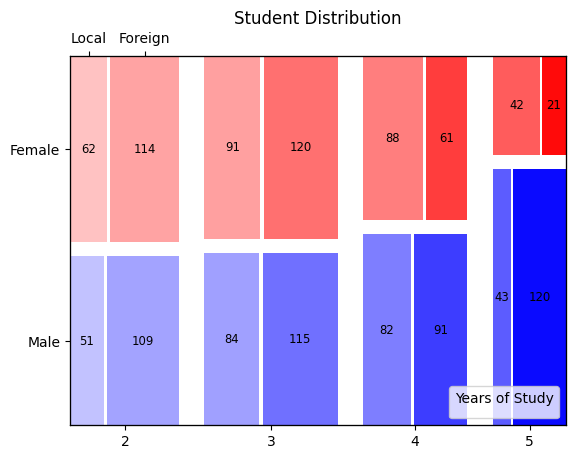

In [62]:
# Create a mosaic plot

def rect_props(key):

    color = 'red' if key[1] == 'Female' else 'blue'
    alpha = 0.3 + (int(key[0]) - 2) / 3 * 0.5  # normalize years of study to alpha value between 0.3 and 0.8
    if key[2] == 'Local':
        alpha *= 0.8  # reduce alpha for local students
    if key[2] == 'Foreign':
        alpha *= 1.2  # increase alpha for foreign students
    return {'facecolor': color, 'alpha': alpha}


mosaic_data = data[['Years_studied','Gender', 'Origin']]
mosaic_data['Years_studied'] = mosaic_data['Years_studied'].astype(str)
mosaic_data['count'] = 1  # add a count column of 1 for each row
mosaic_dict = mosaic_data.groupby(['Years_studied','Gender', 'Origin']).size().to_dict()
print(mosaic_dict)

mosaic(data, ['Years_studied','Gender','Origin'], title='Student Distribution', labelizer=lambda key: mosaic_dict.get(key),properties=rect_props, gap=0.06,)

# Add a legend
plt.legend(title='Years of Study', loc='lower right')

# Show the plot
plt.show()

In [44]:
mosaic_data = data[['Gender', 'Origin', 'Years_studied']]
mosaic_data['count'] = 1  # add a count column of 1 for each row
mosaic_dict = mosaic_data.groupby(['Gender', 'Origin', 'Years_studied']).size().to_dict()


In [45]:
print(mosaic_dict)

{('Female', 'Foreign', 2): 114, ('Female', 'Foreign', 3): 120, ('Female', 'Foreign', 4): 61, ('Female', 'Foreign', 5): 21, ('Female', 'Local', 2): 62, ('Female', 'Local', 3): 91, ('Female', 'Local', 4): 88, ('Female', 'Local', 5): 42, ('Male', 'Foreign', 2): 109, ('Male', 'Foreign', 3): 115, ('Male', 'Foreign', 4): 91, ('Male', 'Foreign', 5): 120, ('Male', 'Local', 2): 51, ('Male', 'Local', 3): 84, ('Male', 'Local', 4): 82, ('Male', 'Local', 5): 43}
